# Link of dataset
### https://www.kaggle.com/akhilkasare/covid19-chest-xray-detection

### but i rebuild this by make folder of covid in test folder include 50 images and non_covid in test has only 50 images too.
### i take the rest of them and put them in train folder
### i devide train folder in the code to train and validation .. 80,20%
### 80% from train folder for Training 
### 20% from train folder for Validation
### data after editing:  https://1drv.ms/u/s!AkrK2fe4qQRghCF799KHlZLavVby?e=ddXuJg

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing import image
from keras.optimizers import Adam
import warnings
import os

Using TensorFlow backend.


## Building Model Architecture

In [3]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 57600)            

In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [6]:
train_images = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split=0.2
)

In [7]:
train_data=train_images.flow_from_directory(
    'C:\\Users\hp\OneDrive\Desktop\covid_update (1)\Train',
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'binary',
    subset='training')    

Found 463 images belonging to 2 classes.


In [8]:
val_data= train_images.flow_from_directory(
    'C:\\Users\hp\OneDrive\Desktop\covid_update (1)\Train',
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'binary',
    subset='validation'
)

Found 115 images belonging to 2 classes.


In [9]:
T = model.fit_generator(
train_data,
steps_per_epoch =train_data.samples//train_data.batch_size,
validation_data = val_data,
validation_steps = val_data.samples//val_data.batch_size,
epochs = 20
)

Epoch 1/20
14/14 [==============================] - 52s 4s/step - loss: 0.9263 - accuracy: 0.5800 - val_loss: 0.6620 - val_accuracy: 0.4896
Epoch 2/20
14/14 [==============================] - 36s 3s/step - loss: 0.4676 - accuracy: 0.7912 - val_loss: 0.3189 - val_accuracy: 0.8675
Epoch 3/20
14/14 [==============================] - 32s 2s/step - loss: 0.3191 - accuracy: 0.8445 - val_loss: 0.2065 - val_accuracy: 0.8193
Epoch 4/20
14/14 [==============================] - 30s 2s/step - loss: 0.3441 - accuracy: 0.8863 - val_loss: 0.2490 - val_accuracy: 0.9036
Epoch 5/20
14/14 [==============================] - 32s 2s/step - loss: 0.2366 - accuracy: 0.9072 - val_loss: 0.2186 - val_accuracy: 0.9062
Epoch 6/20
14/14 [==============================] - 37s 3s/step - loss: 0.1500 - accuracy: 0.9353 - val_loss: 0.4653 - val_accuracy: 0.8916
Epoch 7/20
14/14 [==============================] - 32s 2s/step - loss: 0.1387 - accuracy: 0.9513 - val_loss: 0.0713 - val_accuracy: 1.0000
Epoch 8/20
14/14 [==

## Plot Trainnig and Validation Curves.

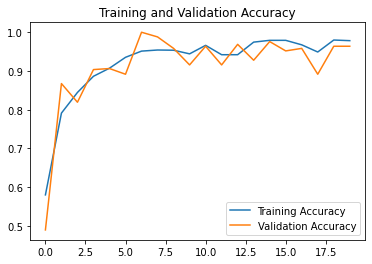

In [10]:
acc = T.history['accuracy']
val_acc = T.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

## Model Functions

In [11]:
train_data.image_shape

(256, 256, 3)

In [12]:
train_data.class_indices

{'covid': 0, 'non_covid': 1}

## Test our Model

### 1st from test_covid

In [13]:
from keras.preprocessing import image
test_image=image.load_img('C:\\Users\hp\OneDrive\Desktop\covid_update (1)\Test\covid\CD50BA96-6982-4C80-AE7B-5F67ACDBFA56.jpeg'
                        ,target_size=(256,256))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)

Prediction Of Our Model :  Postive For Covid-19


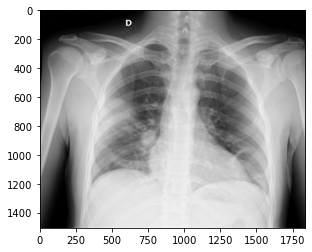

In [14]:
result=model.predict(test_image)
if result[0][0] == 0:
    prediction = 'Postive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)


img2=image.load_img('C:\\Users\hp\OneDrive\Desktop\covid_update (1)\Test\covid\CD50BA96-6982-4C80-AE7B-5F67ACDBFA56.jpeg')
plt.imshow(img2)

### 2nd from test_non_covid

In [15]:
test_image2=image.load_img(r'C:\Users\hp\OneDrive\Desktop\covid_update (1)\Test\non_covid\patient00762-study1-view1_frontal.jpg',target_size=(256,256))
test_image2=image.img_to_array(test_image2)
test_image2=np.expand_dims(test_image2,axis=0)

Prediction Of Our Model :  Negative for Covid-19


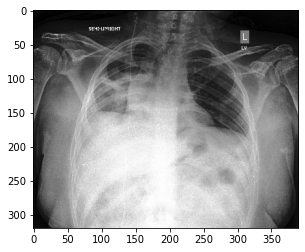

In [16]:
result=model.predict(test_image2)
if result[0][0] == 0:
    prediction = 'Postive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

img2=image.load_img(r'C:\Users\hp\OneDrive\Desktop\covid_update (1)\Test\non_covid\patient00762-study1-view1_frontal.jpg')
plt.imshow(img2)

In [17]:
covid=[]
test_path1=r'C:\Users\hp\OneDrive\Desktop\covid_update (1)\Test\covid'
for imgp in os.listdir(test_path1):
    imgp = os.path.join(test_path1, imgp)
    imgp = image.load_img(imgp, target_size=(256,256))
    imgp = image.img_to_array(imgp)
    imgp = np.expand_dims(imgp, axis=0)
    covid.append(imgp)

In [18]:
len(covid)

50

In [19]:
cov_label=[]
for i in covid:
    pred = model.predict(i)
   
    if int(pred) == 0:
        cov_label.append(0)
    else:
        cov_label.append(1)

In [20]:
cov_label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [28]:
# 2 false from 50
acc_cov=(48*100/50)
acc_cov

96.0

In [22]:
non_covid=[]
test_path2=r'C:\Users\hp\OneDrive\Desktop\covid_update (1)\Test\non_covid'
for imgn in os.listdir(test_path2):
    imgn = os.path.join(test_path2, imgn)
    imgn = image.load_img(imgn, target_size=(256,256))
    imgn = image.img_to_array(imgn)
    imgn = np.expand_dims(imgn, axis=0)
    non_covid.append(imgn)

In [23]:
len(non_covid)

50

In [24]:
non_cov_label=[]
for i in non_covid:
    pred = model.predict(i)
   
    if int(pred) == 0:
        non_cov_label.append(0)
    else:
        non_cov_label.append(1)

In [25]:
non_cov_label

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [29]:
#6 false from 50
acc_noncovid =44*100/50
acc_noncovid

88.0

In [37]:
#As a total 8 false from 100 images 
total_test_acc=92*100/100
total_test_acc

92.0

# Total test accuracy =92%

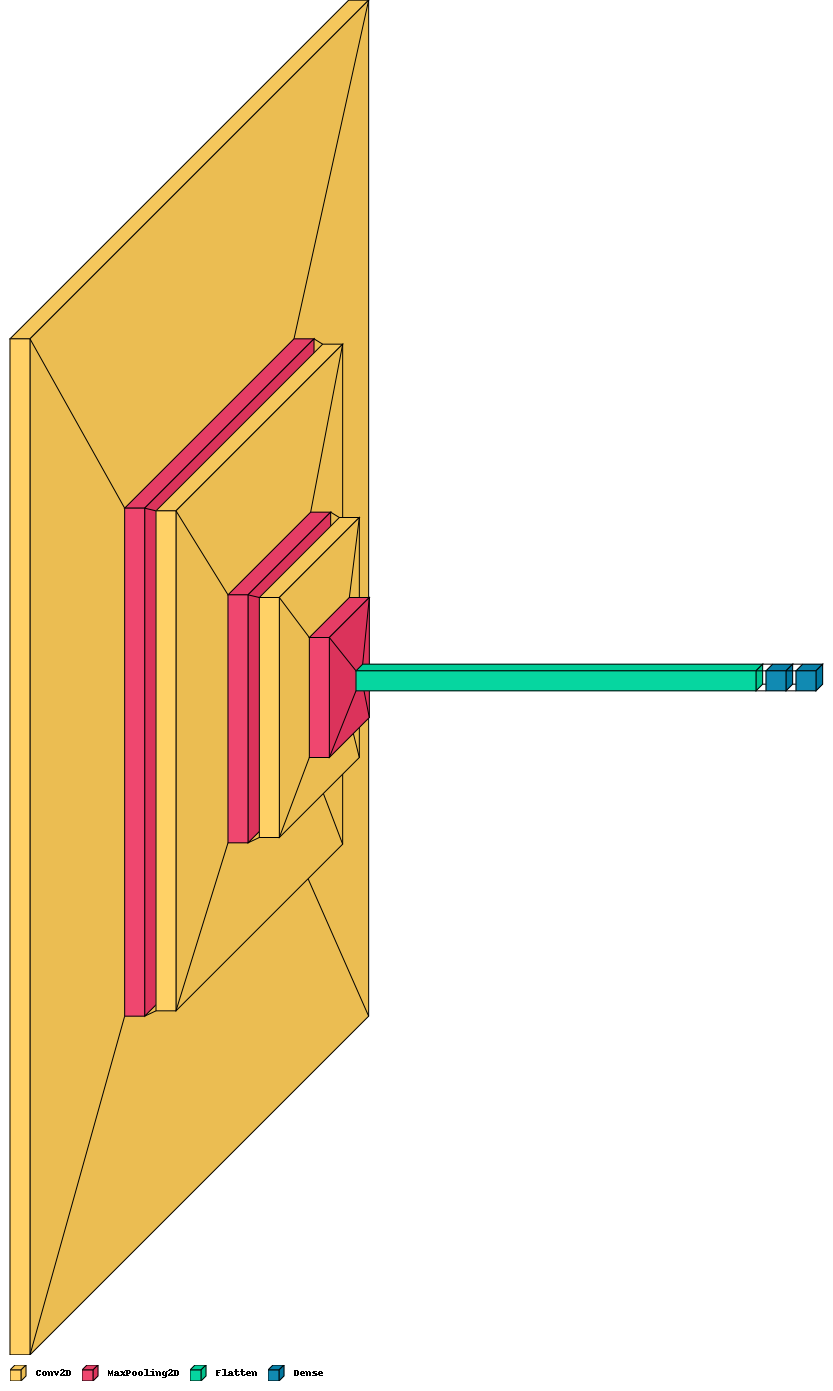

In [46]:
!pip install visualkeras
import visualkeras
layers=visualkeras.layered_view(model, legend=True)
layers